In [34]:
import pandas as pd

train_df = pd.read_csv('KDDTrain+.csv')
test_df = pd.read_csv('KDDTest+.csv')

train_df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'label', 'difficulty_level']


test_df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'label', 'difficulty_level']

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
import time

In [37]:
tot_df = pd.concat([train_df,test_df])

tot_df.shape


(148515, 43)

In [38]:
tot_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'difficulty_level'],
      dtype='object')

In [39]:
tot_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [40]:
new_tot_df = tot_df.copy()

In [41]:
new_tot_df.shape

(148515, 43)

In [42]:
whole_label = new_tot_df.label

In [43]:
whole_label

0         normal
1        neptune
2         normal
3         normal
4        neptune
          ...   
22538     normal
22539     normal
22540       back
22541     normal
22542      mscan
Name: label, Length: 148515, dtype: object

In [44]:
new_whole_label=whole_label.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

In [45]:
new_whole_label.shape

(148515,)

In [46]:
new_whole_label

0        0
1        1
2        0
3        0
4        1
        ..
22538    0
22539    0
22540    1
22541    0
22542    2
Name: label, Length: 148515, dtype: int64

In [47]:
tot_df['nlabel'] = new_whole_label

In [48]:
tot_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level,nlabel
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,0
22539,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,0
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,1
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [49]:
from sklearn.preprocessing import LabelEncoder

le_proctype = LabelEncoder()
le_service = LabelEncoder()
le_flag = LabelEncoder()

In [50]:
tot_df['new_protocol_type'] = le_proctype.fit_transform(tot_df['protocol_type'])
tot_df['new_service'] = le_service.fit_transform(tot_df['service'])
tot_df['new_flag'] = le_flag.fit_transform(tot_df['flag'])

In [51]:
tot_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level,nlabel,new_protocol_type,new_service,new_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.00,0.00,0.00,normal,15,0,2,44,9
1,0,tcp,private,S0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,neptune,19,1,1,49,5
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.01,0.00,0.01,normal,21,0,1,24,9
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,normal,21,0,1,24,9
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,neptune,21,1,1,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.01,0.00,0.00,0.00,normal,21,0,1,54,9
22539,0,tcp,http,SF,317,938,0,0,0,0,...,0.01,0.00,0.00,0.00,normal,21,0,1,24,9
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.07,0.07,back,15,1,1,24,9
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.00,0.00,0.00,0.00,normal,21,0,2,12,9


In [52]:
n_tot_df = tot_df.drop(['protocol_type','service','flag','label'],axis='columns')

In [53]:
n_tot_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level,nlabel,new_protocol_type,new_service,new_flag
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,15,0,2,44,9
1,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,19,1,1,49,5
2,0,232,8153,0,0,0,0,0,1,0,...,0.04,0.03,0.01,0.00,0.01,21,0,1,24,9
3,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,21,0,1,24,9
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,1.00,1.00,21,1,1,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,794,333,0,0,0,0,0,1,0,...,0.01,0.01,0.00,0.00,0.00,21,0,1,54,9
22539,0,317,938,0,0,0,0,0,1,0,...,0.01,0.01,0.00,0.00,0.00,21,0,1,24,9
22540,0,54540,8314,0,0,0,2,0,1,1,...,0.00,0.00,0.00,0.07,0.07,15,1,1,24,9
22541,0,42,42,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,21,0,2,12,9


In [54]:
target = n_tot_df['nlabel']
inputs = n_tot_df.drop(['nlabel'],axis='columns')

In [55]:
inputs.shape

(148515, 42)

In [56]:
target.shape

(148515,)

In [57]:
import numpy as np

Variance Threshold

In [58]:
from sklearn.feature_selection import VarianceThreshold
vt_df = inputs.copy()

In [59]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(vt_df)

array([[0.000e+00, 1.460e+02, 0.000e+00, ..., 2.000e+00, 4.400e+01,
        9.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 4.900e+01,
        5.000e+00],
       [0.000e+00, 2.320e+02, 8.153e+03, ..., 1.000e+00, 2.400e+01,
        9.000e+00],
       ...,
       [0.000e+00, 5.454e+04, 8.314e+03, ..., 1.000e+00, 2.400e+01,
        9.000e+00],
       [0.000e+00, 4.200e+01, 4.200e+01, ..., 2.000e+00, 1.200e+01,
        9.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 5.700e+01,
        1.000e+00]])

In [60]:
vt_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level,new_protocol_type,new_service,new_flag
0,0,146,0,0,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,15,2,44,9
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,19,1,49,5
2,0,232,8153,0,0,0,0,0,1,0,...,0.03,0.04,0.03,0.01,0.00,0.01,21,1,24,9
3,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,21,1,24,9
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,21,1,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,794,333,0,0,0,0,0,1,0,...,0.01,0.01,0.01,0.00,0.00,0.00,21,1,54,9
22539,0,317,938,0,0,0,0,0,1,0,...,0.01,0.01,0.01,0.00,0.00,0.00,21,1,24,9
22540,0,54540,8314,0,0,0,2,0,1,1,...,0.00,0.00,0.00,0.00,0.07,0.07,15,1,24,9
22541,0,42,42,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,21,2,12,9


Pearson Correlation

In [61]:
feature_name = list(tot_df.columns)

num_feats=20

In [62]:
def cor_selector(inputs, target,num_feats):
    cor_list = []
    feature_name = inputs.columns.tolist()
    # calculate the correlation with y for each feature
    for i in inputs.columns.tolist():
        cor = np.corrcoef(inputs[i], target)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = inputs.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(inputs, target,num_feats)
print(str(len(cor_feature)), 'selected features')

20 selected features


E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [63]:
cor_feature

['new_protocol_type',
 'new_service',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'srv_serror_rate',
 'diff_srv_rate',
 'serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'srv_rerror_rate',
 'count',
 'rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_diff_srv_rate',
 'same_srv_rate',
 'new_flag',
 'dst_host_same_srv_rate',
 'logged_in',
 'dst_host_srv_count',
 'difficulty_level']

In [64]:
pcr=tot_df[cor_feature]

In [65]:
import time

In [66]:
pcr

,new_protocol_type,new_service,dst_host_same_src_port_rate,dst_host_rerror_rate,srv_serror_rate,diff_srv_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,srv_rerror_rate,count,rerror_rate,dst_host_srv_rerror_rate,dst_host_diff_srv_rate,same_srv_rate,new_flag,dst_host_same_srv_rate,logged_in,dst_host_srv_count,difficulty_level
0,2,44,0.88,0.00,0.0,0.15,0.0,0.00,0.00,0.0,13,0.0,0.00,0.60,0.08,9,0.00,0,1,15
1,1,49,0.00,0.00,1.0,0.07,1.0,1.00,1.00,0.0,123,0.0,0.00,0.05,0.05,5,0.10,0,26,19
2,1,24,0.03,0.00,0.2,0.00,0.2,0.03,0.01,0.0,5,0.0,0.01,0.00,1.00,9,1.00,1,255,21
3,1,24,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,30,0.0,0.00,0.00,1.00,9,1.00,1,255,21
4,1,49,0.00,1.00,0.0,0.06,0.0,0.00,0.00,1.0,121,1.0,1.00,0.07,0.16,1,0.07,0,19,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,1,54,0.01,0.00,0.0,0.00,0.0,0.01,0.00,0.0,1,0.0,0.00,0.06,1.00,9,0.72,1,141,21
22539,1,24,0.01,0.00,0.0,0.00,0.0,0.01,0.00,0.0,2,0.0,0.00,0.00,1.00,9,1.00,1,255,21
22540,1,24,0.00,0.07,0.0,0.00,0.0,0.00,0.00,0.0,5,0.0,0.07,0.00,1.00,9,1.00,1,255,15
22541,2,12,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,4,0.0,0.00,0.01,1.00,9,0.99,0,252,21


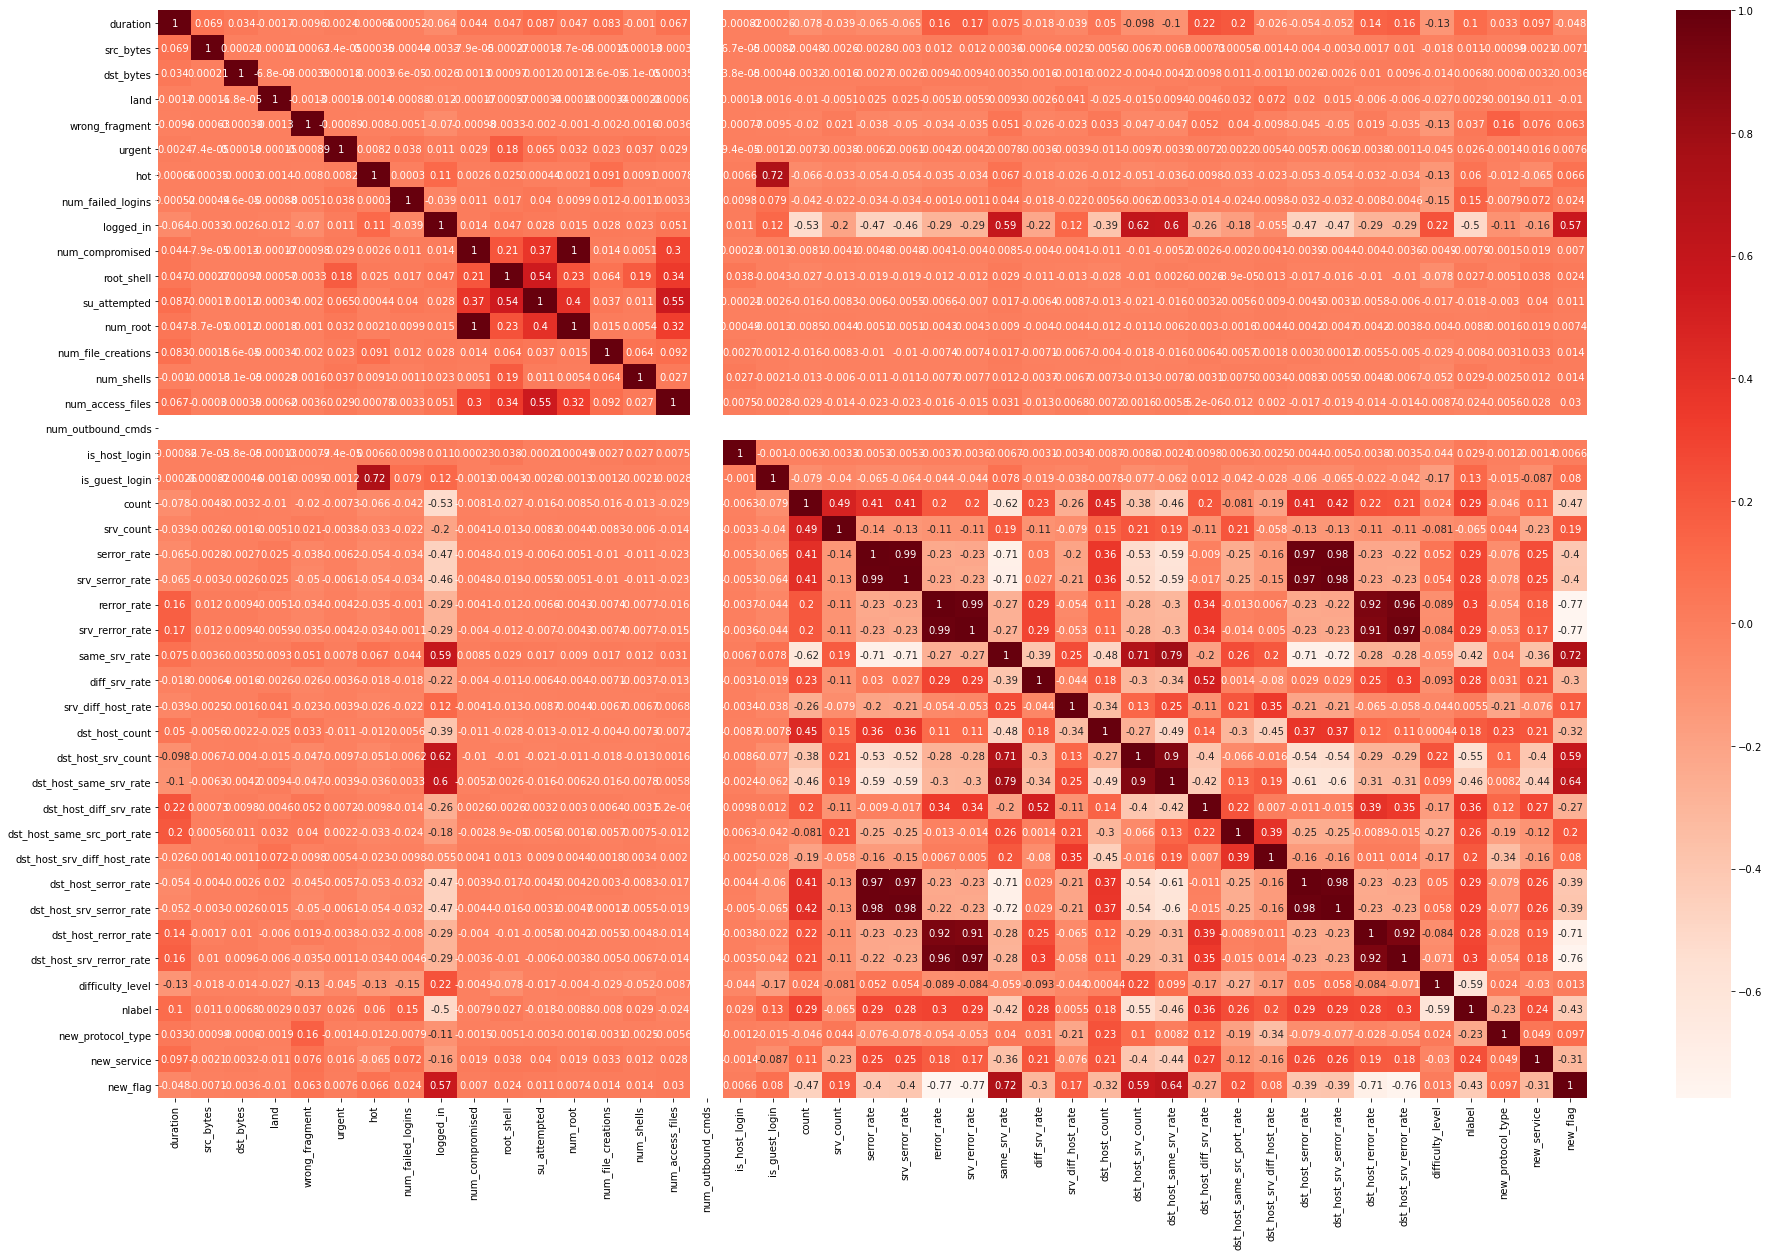

In [67]:
plt.figure(figsize=(32,20))
cor = n_tot_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Split inputs and targets

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(pcr,target,train_size=0.7)

Logistic Regression


In [70]:
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression(max_iter=500)

In [71]:
start = time.time()
lgreg.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [72]:
lgreg.score(X_test,y_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 31.850861072540283s


Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=20)

In [74]:
start = time.time()
rdf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [75]:
rdf.score(X_test,y_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 1.6781492233276367s


KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)

In [78]:
start = time.time()
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
knn.score(X_test,y_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 9.970927953720093s


Chi Squared 

In [80]:
chi_df = inputs.copy()

In [81]:
chi_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level,new_protocol_type,new_service,new_flag
0,0,146,0,0,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,15,2,44,9
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,19,1,49,5
2,0,232,8153,0,0,0,0,0,1,0,...,0.03,0.04,0.03,0.01,0.00,0.01,21,1,24,9
3,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,21,1,24,9
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,21,1,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,794,333,0,0,0,0,0,1,0,...,0.01,0.01,0.01,0.00,0.00,0.00,21,1,54,9
22539,0,317,938,0,0,0,0,0,1,0,...,0.01,0.01,0.01,0.00,0.00,0.00,21,1,24,9
22540,0,54540,8314,0,0,0,2,0,1,1,...,0.00,0.00,0.00,0.00,0.07,0.07,15,1,24,9
22541,0,42,42,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,21,2,12,9


In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(chi_df)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, target)
chi_support = chi_selector.get_support()
chi_feature = chi_df.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

20 selected features


In [83]:
chi_input = chi_df[chi_feature]

In [84]:
chi_feature

['logged_in',
 'root_shell',
 'is_guest_login',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [85]:
chi_input

,logged_in,root_shell,is_guest_login,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
1,0,0,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,1,0,0,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,1,0,0,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,0,0,121,0.0,0.0,1.0,1.0,0.16,0.06,0.00,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,1,0,0,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
22539,1,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.18,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
22540,1,0,0,5,0.0,0.0,0.0,0.0,1.00,0.00,0.20,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
22541,0,0,0,4,0.0,0.0,0.0,0.0,1.00,0.00,0.33,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


Random Forest

In [86]:
chiX_train, chiX_test, chiy_train, chiy_test = train_test_split(chi_input,target,train_size=0.7)

In [87]:
start = time.time()
rdf.fit(chiX_train,chiy_train)

RandomForestClassifier(n_estimators=20)

In [88]:
rdf.score(chiX_test,chiy_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 1.8410885334014893s


In [89]:
lgreg.fit(chiX_train,chiy_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [90]:
lgreg.score(chiX_test,chiy_test)

0.8985074626865671

In [91]:
start = time.time()
knn.fit(chiX_train,chiy_train)

KNeighborsClassifier(n_neighbors=3)

In [92]:
knn.score(chiX_test,chiy_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 5.627953052520752s


Recursive Feature Elimination

In [93]:
rfe_num_feats = 20

In [94]:
from sklearn.feature_selection import RFE
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=rfe_num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, target)

Fitting estimator with 42 features.


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 32 features.


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 22 features.


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

RFE(estimator=LogisticRegression(), n_features_to_select=20, step=10, verbose=5)

In [95]:
rfe_support = rfe_selector.get_support()
rfe_feature = chi_df.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

20 selected features


In [96]:
rfe_feature

['duration',
 'land',
 'wrong_fragment',
 'hot',
 'num_failed_logins',
 'root_shell',
 'is_guest_login',
 'count',
 'srv_count',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_rerror_rate',
 'difficulty_level',
 'new_protocol_type']

In [97]:
rfe_input = chi_df[rfe_feature]

In [98]:
rfe_input

,duration,land,wrong_fragment,hot,num_failed_logins,root_shell,is_guest_login,count,srv_count,srv_serror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,difficulty_level,new_protocol_type
0,0,0,0,0,0,0,0,13,1,0.0,0.08,0.15,255,0.00,0.88,0.00,0.00,0.00,15,2
1,0,0,0,0,0,0,0,123,6,1.0,0.05,0.07,255,0.10,0.00,0.00,1.00,0.00,19,1
2,0,0,0,0,0,0,0,5,5,0.2,1.00,0.00,30,1.00,0.03,0.04,0.03,0.00,21,1
3,0,0,0,0,0,0,0,30,32,0.0,1.00,0.00,255,1.00,0.00,0.00,0.00,0.00,21,1
4,0,0,0,0,0,0,0,121,19,0.0,0.16,0.06,255,0.07,0.00,0.00,0.00,1.00,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,0,0,0,0,0,0,1,1,0.0,1.00,0.00,100,0.72,0.01,0.01,0.01,0.00,21,1
22539,0,0,0,0,0,0,0,2,11,0.0,1.00,0.00,197,1.00,0.01,0.01,0.01,0.00,21,1
22540,0,0,0,2,0,0,0,5,10,0.0,1.00,0.00,255,1.00,0.00,0.00,0.00,0.07,15,1
22541,0,0,0,0,0,0,0,4,6,0.0,1.00,0.00,255,0.99,0.00,0.00,0.00,0.00,21,2


In [99]:
rfeX_train, rfeX_test, rfey_train, rfey_test = train_test_split(rfe_input,target,train_size=0.7)

In [100]:
start = time.time()
lgreg.fit(rfeX_train,rfey_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [101]:
lgreg.score(rfeX_test,rfey_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 33.32691669464111s


In [102]:
start = time.time()
rdf.fit(rfeX_train,rfey_train)

RandomForestClassifier(n_estimators=20)

In [103]:
rdf.score(rfeX_test,rfey_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 1.6276803016662598s


In [104]:

rfe_knn = KNeighborsClassifier(n_neighbors=3)

In [105]:
start = time.time()
rfe_knn.fit(rfeX_train,rfey_train)


KNeighborsClassifier(n_neighbors=3)

In [106]:
rfe_knn.score(rfeX_test,rfey_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 44.74243688583374s


Select From Model

In [107]:
forest_input = inputs.copy()
forest_target = target.copy()

In [108]:
forest_target.shape

(148515,)

In [109]:
fX_train, fX_test, fy_train, fy_test = train_test_split(forest_input,forest_target,train_size=0.7)

In [111]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(fX_train,fy_train)

RandomForestClassifier()

In [112]:
import pandas as pd
feature_imps = pd.Series(clf.feature_importances_,index=forest_input.columns).sort_values(ascending=False)
feature_imps

src_bytes                      0.109198
dst_bytes                      0.091593
count                          0.078266
difficulty_level               0.077799
diff_srv_rate                  0.070382
same_srv_rate                  0.064970
new_flag                       0.055673
serror_rate                    0.042804
srv_serror_rate                0.037712
dst_host_srv_count             0.034591
dst_host_same_srv_rate         0.031718
dst_host_same_src_port_rate    0.031415
dst_host_serror_rate           0.029947
dst_host_diff_srv_rate         0.029354
new_service                    0.025907
dst_host_rerror_rate           0.025014
new_protocol_type              0.024572
srv_count                      0.024029
dst_host_count                 0.017691
logged_in                      0.017535
dst_host_srv_diff_host_rate    0.016164
dst_host_srv_serror_rate       0.010648
rerror_rate                    0.009348
srv_diff_host_rate             0.008690
duration                       0.007375


In [113]:
feature_imps.shape

(42,)

In [114]:
df2= feature_imps.head(20)
df4 = df2.index

In [115]:
df4

Index(['src_bytes', 'dst_bytes', 'count', 'difficulty_level', 'diff_srv_rate',
       'same_srv_rate', 'new_flag', 'serror_rate', 'srv_serror_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate',
       'dst_host_diff_srv_rate', 'new_service', 'dst_host_rerror_rate',
       'new_protocol_type', 'srv_count', 'dst_host_count', 'logged_in'],
      dtype='object')

No handles with labels found to put in legend.


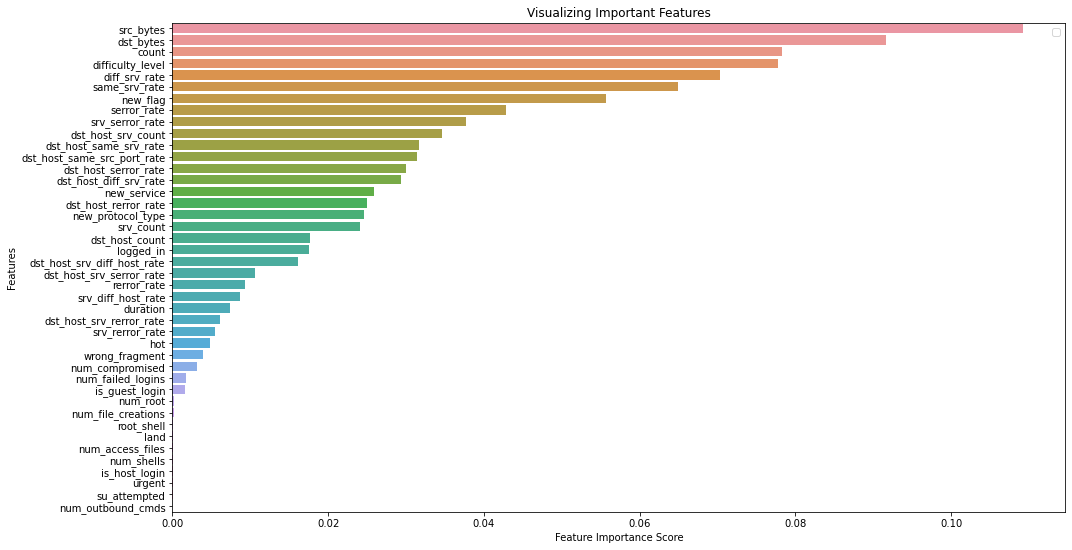

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(16,9))
sns.barplot(x=feature_imps, y=feature_imps.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()

plt.show()

In [117]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=40)
embeded_rf_selector.fit(forest_input,forest_target)

SelectFromModel(estimator=RandomForestClassifier(), max_features=40)

In [118]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = forest_input.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

16 selected features


In [119]:
embeded_rf_feature

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'difficulty_level',
 'new_protocol_type',
 'new_service',
 'new_flag']

In [120]:
rfx = forest_input[df4]

In [121]:
finalX_train, finalX_test, finaly_train, finaly_test = train_test_split(rfx,forest_target,train_size=0.7)

In [122]:
from sklearn.linear_model import LogisticRegression
flgreg = LogisticRegression(max_iter=500)

In [123]:
start = time.time()
flgreg.fit(finalX_train,finaly_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [124]:
flgreg.score(finalX_test,finaly_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 72.03027439117432s


In [125]:
from sklearn.ensemble import RandomForestClassifier
frdf = RandomForestClassifier(n_estimators=20)

In [126]:
start = time.time()
frdf.fit(finalX_train,finaly_train)

RandomForestClassifier(n_estimators=20)

In [127]:
frdf.score(finalX_test,finaly_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 1.7593553066253662s


In [128]:
fknn = KNeighborsClassifier(n_neighbors=3)

In [129]:
start = time.time()
fknn.fit(finalX_train,finaly_train)

KNeighborsClassifier(n_neighbors=3)

In [130]:
fknn.score(finalX_test,finaly_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 9.931411981582642s
